In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [511]:
base_path = os.path.dirname(os.getcwd())  # one level up from notebook folder
df_path = os.path.join(base_path, "Datasets", "Algerian_forest_fires_dataset_UPDATE.csv")

df = pd.read_csv(df_path, header = 1)
df.head()
#note:
# take FWI as target for regression
#take classes as target for classification


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning


In [513]:
df.isnull().sum()
#so except for day, all others have one nan value. But what records are they?

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [514]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [515]:
df.iloc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


Lets create a column named "region" representing 

0. Bejaia region : index 0 to 121

1. sidibel abbes region: 123 to end.

we can remove 122,123 records

In [516]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [517]:
#converting region datatype from float to int
df['Region'] = df['Region'].astype(int)

In [518]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [519]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [520]:
df.iloc[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [521]:
#dropping 122 indexed record
df = df.drop(index = [122,123]).reset_index(drop = True)

In [522]:
df.iloc[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [523]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [524]:
df.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

In [525]:
#correcting 165 indexed record
nan_idx = df[df.isnull().any(axis = 1)].index[0]
df.loc[nan_idx, "Classes"] = df.loc[nan_idx, "FWI"]
df.loc[nan_idx, "FWI"] = df[df['FWI']!='fire   ']['FWI'].astype(float).mean()

In [526]:
df.iloc[165]

day                  14
month                07
year               2012
Temperature          37
RH                   37
Ws                   18
Rain                0.2
FFMC               88.9
DMC                12.9
DC               14.6 9
ISI                12.5
BUI                10.4
FWI            7.035391
Classes         fire   
Region                1
Name: 165, dtype: object

In [527]:
df.isnull().sum()
# No nan values anymore. Hurrah!!!

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [528]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [529]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [530]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   year         244 non-null    int32 
 3   Temperature  244 non-null    int32 
 4   RH           244 non-null    int32 
 5   Ws           244 non-null    int32 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.1+ KB


In [532]:
df[df["DC"] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,7.035391,fire,1


In [533]:
df.loc[165, "DC"] = '14.69'

In [534]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [535]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        138
not fire    106
Name: count, dtype: int64

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


# Exploratory Data Analysis

In [537]:
#dropping day, month and year columns
df_copy = df.drop(columns = ['day', 'month', 'year'])
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [538]:
df_copy['Classes'] = df_copy['Classes'].apply(lambda x: 0 if x == 'not fire' else 1)
# mapping = {
#     'not fire': 0,
#     'fire': 1,
#     'smoke': 2,
#     'other': 3
# }

# df_copy['Classes'] = df_copy['Classes'].map(mapping).fillna(-1)

In [539]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

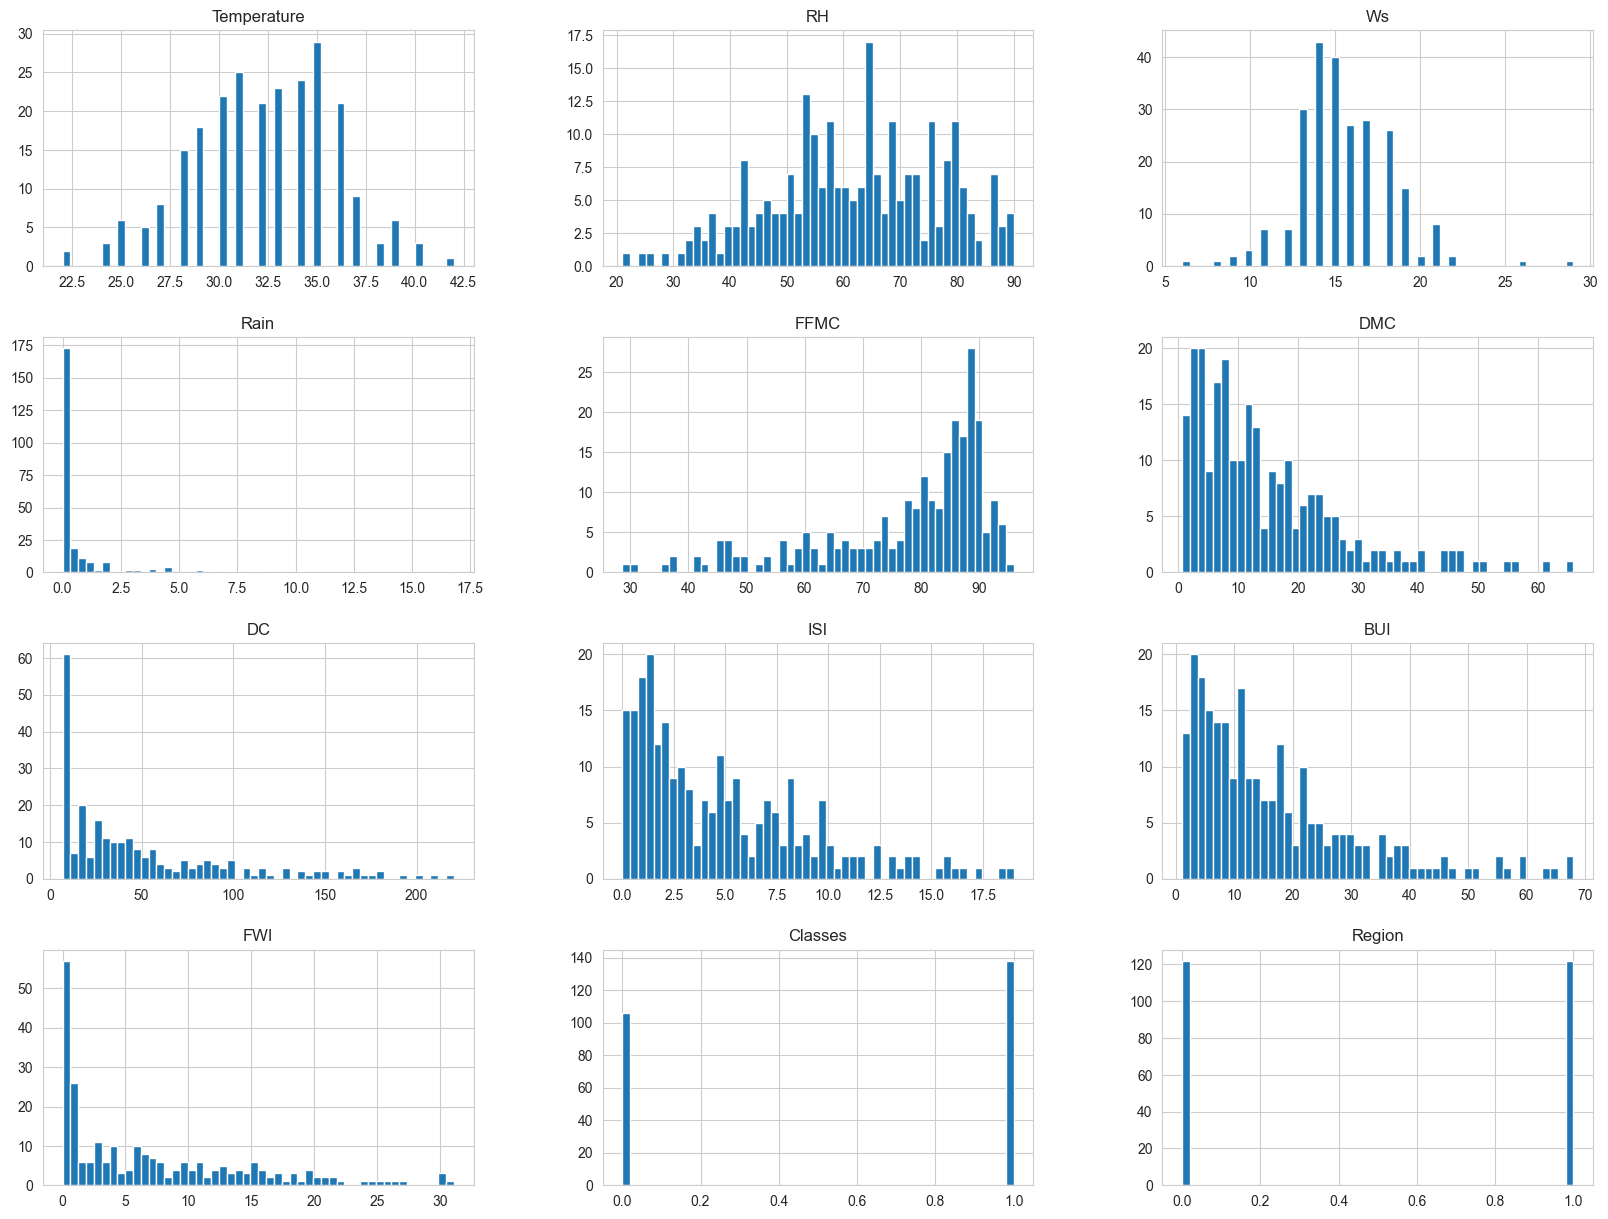

In [540]:
df_copy.hist(bins = 50, figsize=(20,15))

([<matplotlib.patches.Wedge at 0x1033e000fe0>,
 [Text(-0.22500720993803214, 1.0767412667284106, 'Fire'),
  Text(0.2250071091262376, -1.0767412877951015, 'Not Fire')],
 [Text(-0.12273120542074478, 0.5873134182154967, '56.6%'),
  Text(0.12273115043249322, -0.5873134297064189, '43.4%')])

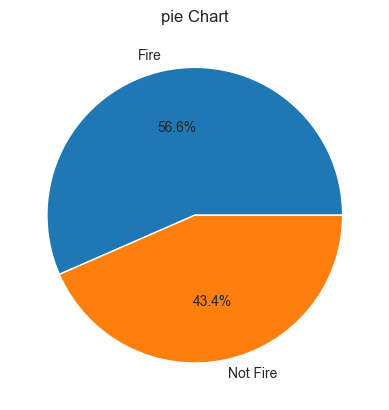

In [541]:
#draw a pie chart using outputs variables
plt.title("pie Chart")
plt.pie(df_copy['Classes'].value_counts(normalize=True)*100,
        labels = ["Fire", "Not Fire"],
        autopct='%1.1f%%')

<Axes: >

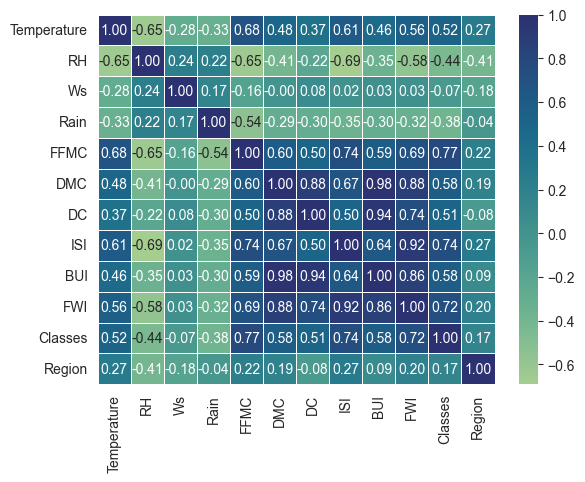

In [542]:
#Draw corr matrix
cor = df_copy.corr()
sns.heatmap(cor, annot = True, fmt=".2f", linewidth=.5, cmap="crest")

<Axes: xlabel='FWI'>

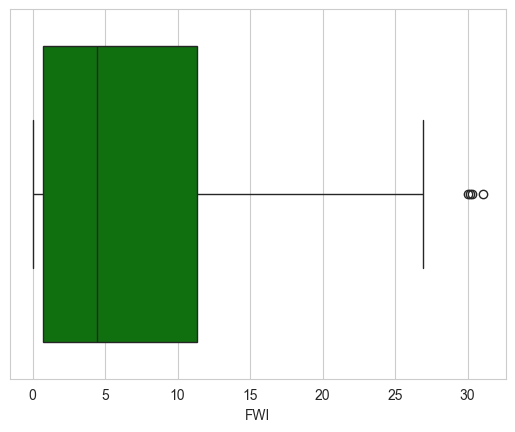

In [543]:
sns.set_style('whitegrid')
sns.boxplot(x = df_copy['FWI'], color = 'green')

<Axes: xlabel='month', ylabel='count'>

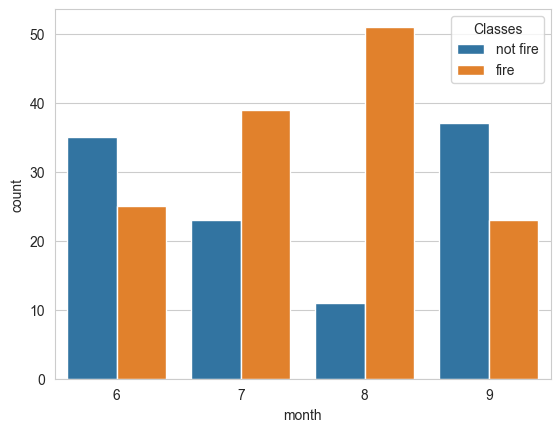

In [544]:
#MOnthly fire analysis
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = df)

Most of the fires happened in the months of June, July and August.

# Feature Selection

In [545]:
#divide columns into independent and dependent features
X = df_copy.drop('FWI', axis = 1)
y = df_copy['FWI']

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                      random_state = 42)

In [547]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [548]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [ ]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

(61, 9)

In [550]:
print(X_train.shape)
print(X_test.shape)

(183, 9)
(61, 9)


# Standardization

In [552]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

Linear Regression

Mean absolute error 0.6075669665526333
R2 Score 0.9888523587097926


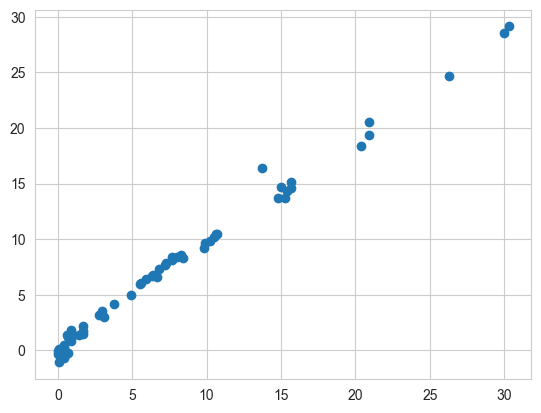

In [553]:
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Lasso Regression

Mean absolute error 1.222772061468996
R2 Score 0.9498780896144685


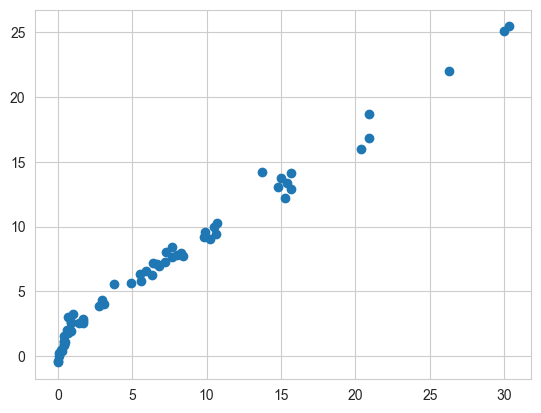

In [554]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Elasticnet

Mean absolute error 1.9197940304923347
R2 Score 0.874882424178001


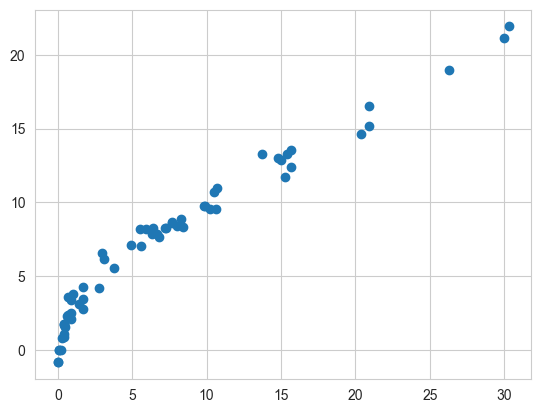

In [555]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Cross validation - Hyper param Tuning

In [556]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [557]:
lassocv.alpha_

0.026808871166009655

In [558]:
lassocv.alphas_

array([6.64076209, 6.19319695, 5.7757962 , 5.38652687, 5.02349299,
       4.68492637, 4.36917802, 4.07471004, 3.80008822, 3.54397499,
       3.30512294, 3.08236872, 2.87462738, 2.68088712, 2.5002043 ,
       2.3316989 , 2.17455019, 2.02799279, 1.89131286, 1.76384471,
       1.64496748, 1.53410217, 1.43070882, 1.33428384, 1.24435757,
       1.16049203, 1.08227876, 1.00933679, 0.94131087, 0.87786967,
       0.81870419, 0.76352627, 0.71206715, 0.66407621, 0.6193197 ,
       0.57757962, 0.53865269, 0.5023493 , 0.46849264, 0.4369178 ,
       0.407471  , 0.38000882, 0.3543975 , 0.33051229, 0.30823687,
       0.28746274, 0.26808871, 0.25002043, 0.23316989, 0.21745502,
       0.20279928, 0.18913129, 0.17638447, 0.16449675, 0.15341022,
       0.14307088, 0.13342838, 0.12443576, 0.1160492 , 0.10822788,
       0.10093368, 0.09413109, 0.08778697, 0.08187042, 0.07635263,
       0.07120672, 0.06640762, 0.06193197, 0.05775796, 0.05386527,
       0.05023493, 0.04684926, 0.04369178, 0.0407471 , 0.03800

In [559]:
lassocv.mse_path_

array([[58.58419754, 43.76850724, 54.61786113, 72.91709755, 37.03534792],
       [53.59568439, 39.22807509, 50.06806283, 69.7558873 , 32.61350576],
       [48.06413432, 34.67365526, 43.74573369, 63.755404  , 28.59114109],
       [42.47683898, 30.68917059, 38.14919682, 58.44720076, 24.57314067],
       [37.5967684 , 27.20196564, 33.28314049, 53.74712517, 21.15421184],
       [33.33348763, 24.14871678, 29.05223641, 49.5815802 , 18.25113147],
       [29.60776131, 21.4742727 , 25.37351288, 45.17972024, 15.79171856],
       [26.35076814, 19.13056643, 22.17526555, 39.92015804, 13.71423104],
       [23.50257035, 17.07570596, 19.39468306, 35.32157143, 11.9645469 ],
       [21.01096194, 15.27319427, 16.97729067, 31.29924144, 10.49611363],
       [18.83024326, 13.69115992, 14.87571399, 27.77964082,  9.26870222],
       [16.92126799, 12.30186476, 13.04875382, 24.69871622,  8.24756589],
       [15.24926587, 11.0811022 , 11.46040601, 22.00004964,  7.40252405],
       [13.78415751, 10.00775807, 10.0

Mean absolute error 0.6456669987880045
R2 Score 0.9879350695757396


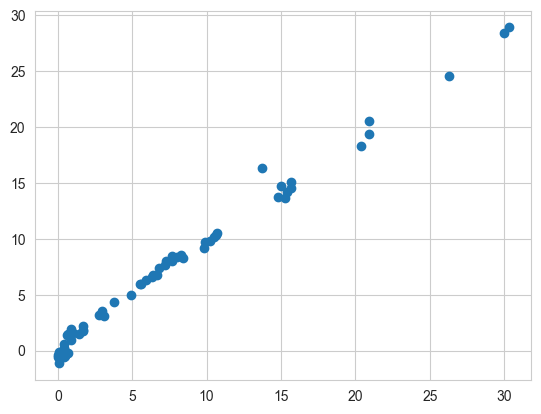

In [560]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6309880485441144
R2 Score 0.98815903969299


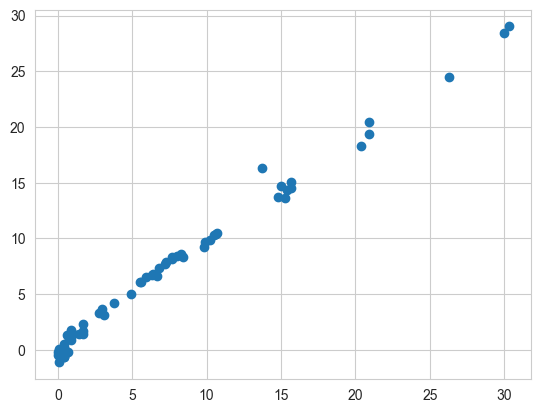

In [561]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6645201512389721
R2 Score 0.9872741775099948


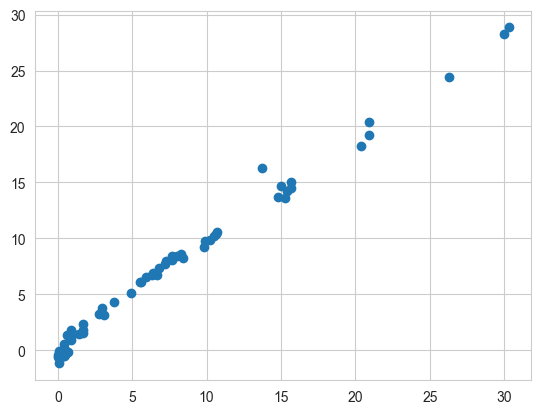

In [562]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)